# ST445: Managing and Visualizing Data

## Matplotlib Primer: Box and Violin Plots

### Milan Vojnovic and Christine Yuen, MT 2017
---

# Boxplots

We show how to plot boxplots and how to adjust their visual properties.

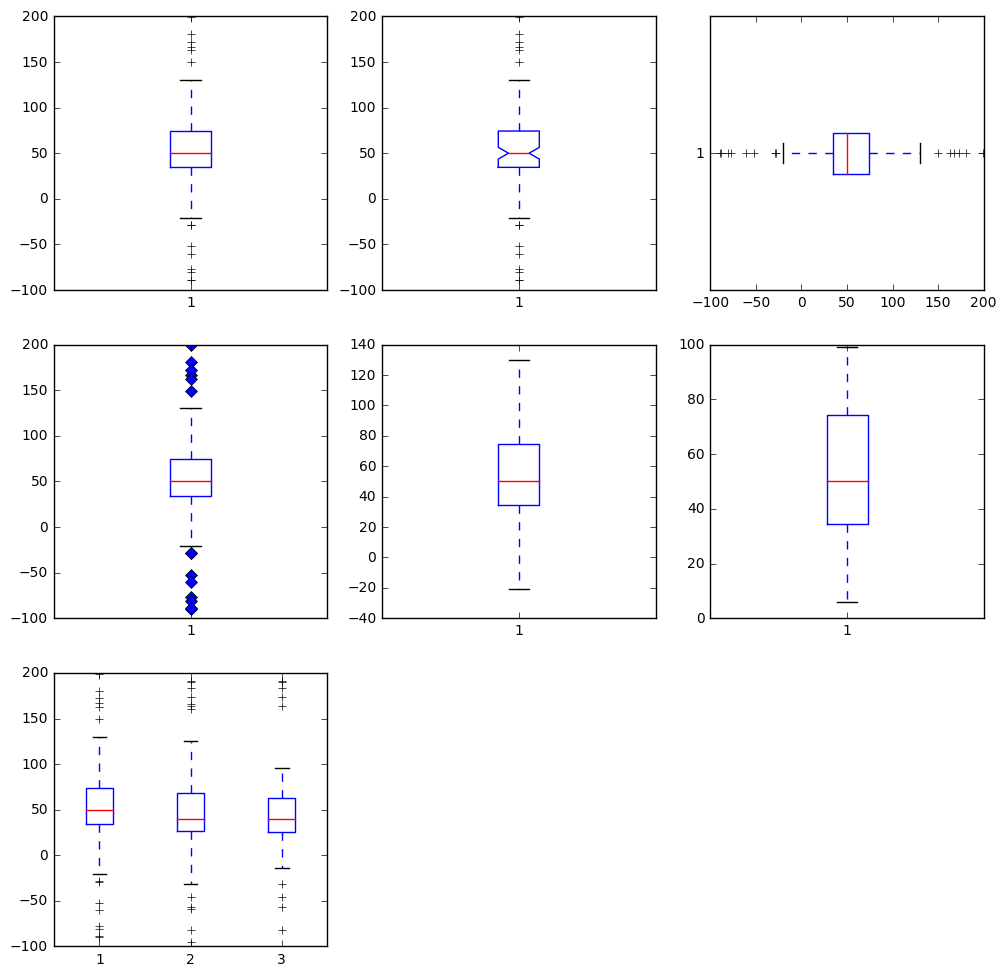

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# generate data
import pandas as pd
import numpy as np

# create some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

plt.figure(figsize=(12,12))

# basic plot
plt.subplot(331)
plt.boxplot(data)

# notched plot
plt.subplot(332)
plt.boxplot(data, notch=True) # default: notch=False

# horizontal boxes
plt.subplot(333)
plt.boxplot(data, vert=False) # default: vert=True

# change outlier point symbols
plt.subplot(334)
plt.boxplot(data, sym='gD') # default: sym='b+'

# don't show outlier points
plt.subplot(335)
plt.boxplot(data, sym='')

# change whisker length
plt.subplot(336)
plt.boxplot(data, sym='', whis=0.75) # default: whis=1.5

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots in one figure

plt.subplot(337)
plt.boxplot(data)

plt.show()

## Notched boxplot: the effect of data sample size

We demonstrate how a boxplot's notch size relates to the data sample size.

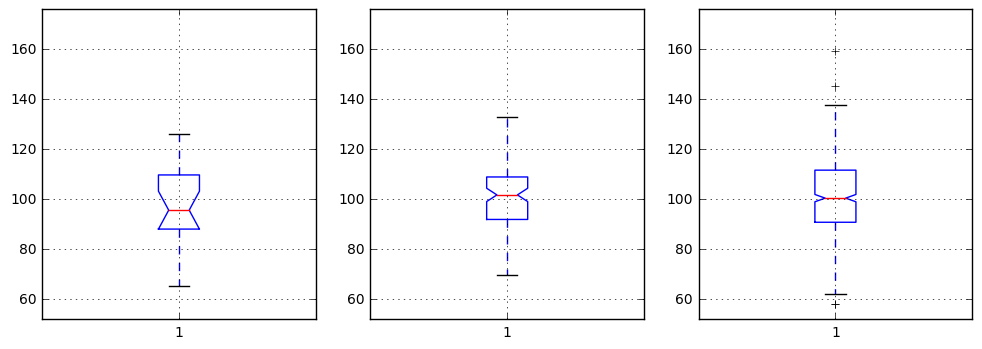

In [2]:
np.random.seed(1)

from math import floor, ceil

mu, sigma = 100, 15
x1 = mu + sigma * np.random.randn(20) # smallest sample size
x2 = mu + sigma * np.random.randn(100)
x3 = mu + sigma * np.random.randn(500) # largest sample size

ymin = floor(min(np.concatenate([x1, x2, x3]))*0.9)
ymax = ceil(max(np.concatenate([x1, x2, x3]))*1.1)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

axes[0].boxplot(x1,1);
axes[0].set_ylim([ymin, ymax])
axes[0].grid(True)

axes[1].boxplot(x2,1);
axes[1].set_ylim([ymin, ymax])
axes[1].grid(True)

axes[2].boxplot(x3,1);
axes[2].set_ylim([ymin, ymax])
axes[2].grid(True)

## Notched boxplot: a strange but legitimate shape 

If the distribution is either skewed or the data sample size is too small we may get a funny looking boxplot.

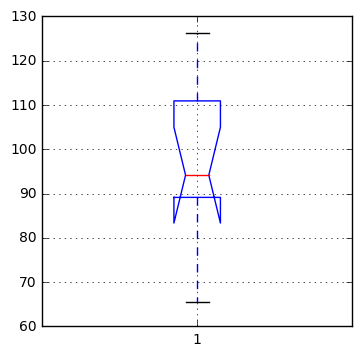

In [3]:
np.random.seed(1)

x4 = mu + sigma * np.random.randn(10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

ax.boxplot(x4,1);
ax.grid(True)

## Violin plots

Violin plots are similar to histograms and box plots in that they show an abstract representation of the probability distribution of the sample. Rather than showing counts of data points that fall into bins or order statistics, violin plots use kernel density estimation (KDE) to compute an empirical distribution of the sample. That computation
is controlled by several parameters. This example demonstrates how to modify the number of points at which the KDE is evaluated (``points``) and how to modify the bandwidth of the KDE (``bw_method``).

For more information about violin plots and the KDE method, you may consult the following scikit-learn document: http://scikit-learn.org/stable/modules/density.html. 

See also: http://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.violinplot.html.

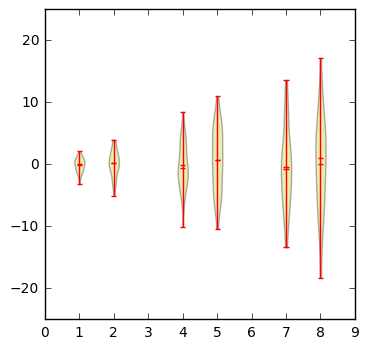

In [4]:
# generate data
np.random.seed(20)
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
data1 = []

fig, ax= plt.subplots(figsize=(4,4))
ax.violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
ax.set_ylim([-25, 25]);

## Violin plots vs boxplots

Note that although violin plots are related to Tukey's (1977) box plots, they add useful information: the distribution of the sample data (density).

By default, box plots show data points outside 1.5x inter-quartile range as outliers above or below the whiskers whereas violin plots show the whole range of the data.

A good general reference on boxplots and their history can be found here: http://vita.had.co.nz/papers/boxplots.pdf

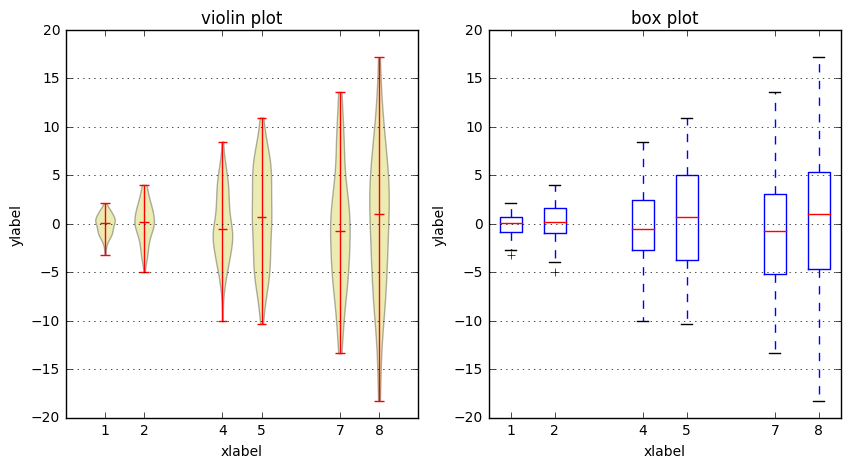

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot violin plot
axes[0].violinplot(data,pos,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(data, positions=pos)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks(pos)
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

plt.show();

## Custom violin plots

We show how to change the maximum width of a violin plot, the number of points to evaluate each of the gaussian kernel density estimatiors, the bandwidth method and the orientation of a plot.

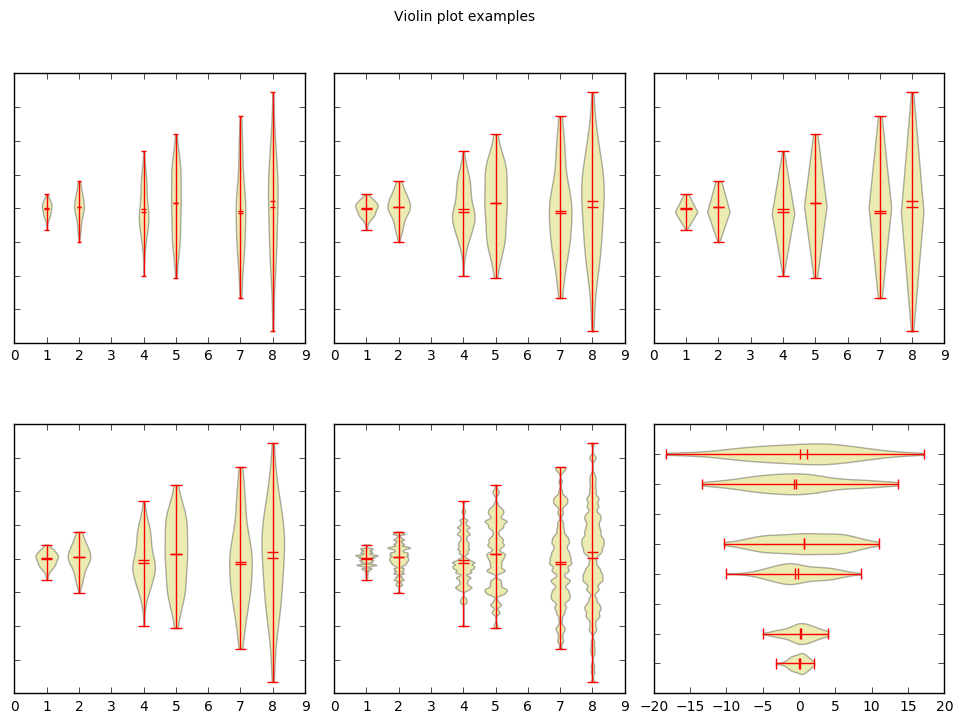

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes[0, 0].violinplot(data, pos, points=200, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)

axes[0, 1].violinplot(data, pos, points=200, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)

axes[0, 2].violinplot(data, pos, points=3, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True) # only use 3 points, the density not "smooth"

axes[1, 0].violinplot(data, pos, points=200,  widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')

axes[1, 1].violinplot(data, pos, points=200, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method=0.05) # the density is not really "average" out

axes[1, 2].violinplot(data, pos, points=200, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)

for ax in axes.flatten():
    ax.set_yticklabels([])

    
fig.suptitle("Violin plot examples")
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3) 
plt.show()

## Impact of the bandwidth value

### Data sampled from a Gausian distribution

(0.8, 1.2)

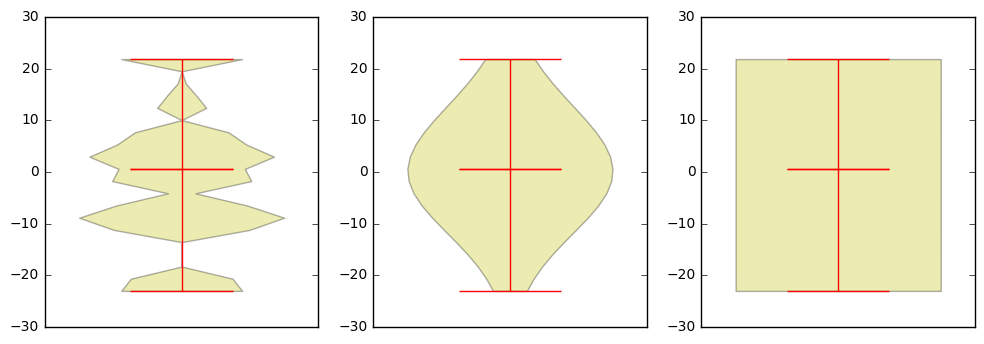

In [7]:
np.random.seed(1)
std = 10
data = np.random.normal(0, std, size=100)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True, bw_method=0.01)
axes[1].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True, bw_method=1)
axes[2].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True, bw_method=100)

axes[0].set_xticks([])
axes[0].set_xlim([0.8, 1.2])
axes[1].set_xticks([])
axes[1].set_xlim([0.8, 1.2])
axes[2].set_xticks([])
axes[2].set_xlim([0.8, 1.2])

### Data sampled from a Gamma distribution

(0.8, 1.2)

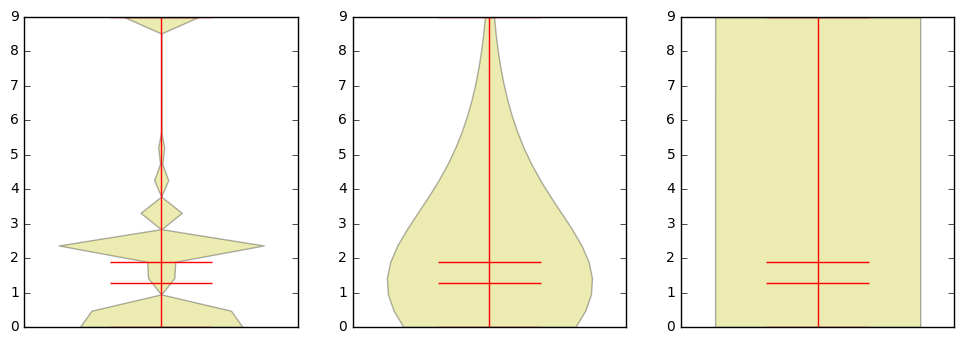

In [8]:
np.random.seed(1)
shape = 1
scale = 2
data = np.random.gamma(shape, scale, 100)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True, bw_method=0.01)
axes[1].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True, bw_method=1)
axes[2].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True, bw_method=100)

axes[0].set_xticks([])
axes[0].set_xlim([0.8, 1.2])
axes[1].set_xticks([])
axes[1].set_xlim([0.8, 1.2])
axes[2].set_xticks([])
axes[2].set_xlim([0.8, 1.2])

## Additional violin examples

For more examples, see: http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


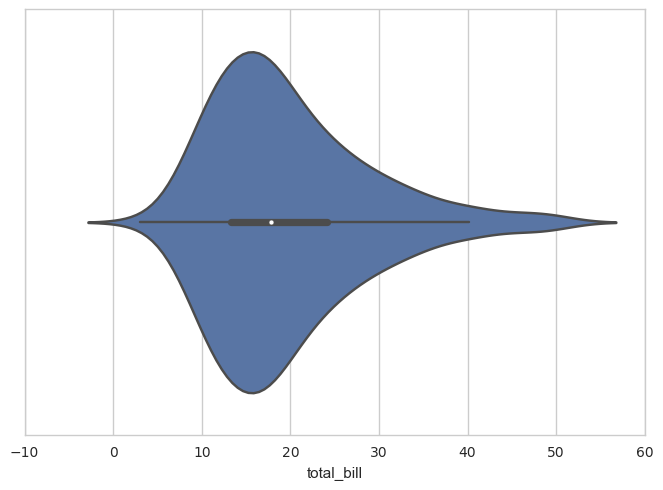

In [9]:
inline_rc = dict(plt.rcParams)

import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
print(tips[0:5])
ax = sns.violinplot(x=tips["total_bill"])

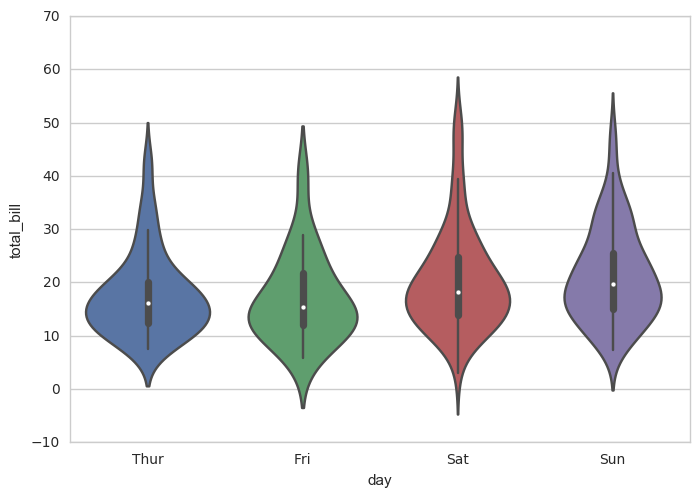

In [10]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

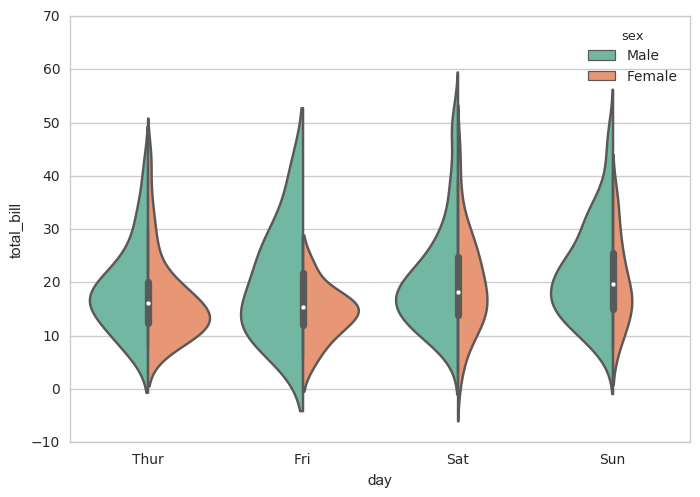

In [11]:
ax = sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tips, palette="Set2", split=True,
                    scale="count")


plt.rcParams.update(inline_rc)